# **Etapa 1 - Importação das Bibliotecas**


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.8.0'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Etapa 2 - Importação da base de dados**

In [11]:
temperature_df = pd.read_csv('/content/Celsius-to-Fahrenheit.csv')
temperature_df.reset_index(drop = True, inplace = True)

In [10]:
temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [9]:
temperature_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [8]:
temperature_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [7]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [12]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# **Etapa 3 - Visualização da base de dados**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


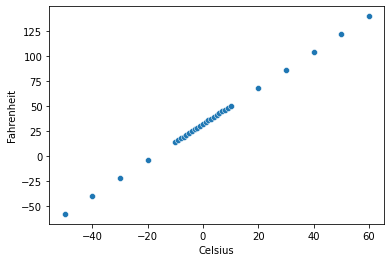

In [14]:
sns.scatterplot(temperature_df['Celsius'], temperature_df['Fahrenheit']);

# **Etapa 4 - Configuração da base de dados de treinamento**

In [15]:
X_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']


In [16]:
X_train

0    -50
1    -40
2    -30
3    -20
4    -10
5     -9
6     -8
7     -7
8     -6
9     -5
10    -4
11    -3
12    -2
13    -1
14     0
15     1
16     2
17     3
18     4
19     5
20     6
21     7
22     8
23     9
24    10
25    20
26    30
27    40
28    50
29    60
Name: Celsius, dtype: int64

In [17]:
y_train

0     -58.0
1     -40.0
2     -22.0
3      -4.0
4      14.0
5      15.8
6      17.6
7      19.4
8      21.2
9      23.0
10     24.8
11     26.6
12     28.4
13     30.2
14     32.0
15     33.8
16     35.6
17     37.4
18     39.2
19     41.0
20     42.8
21     44.6
22     46.4
23     48.2
24     50.0
25     68.0
26     86.0
27    104.0
28    122.0
29    140.0
Name: Fahrenheit, dtype: float64

In [18]:
X_train.shape, y_train.shape

((30,), (30,))

# **Etapa 5 - Construção e treinamento do modelo**

In [20]:
# output = input * w + bias
# t(F) = t(C) * w + bias
# t(F) = t(C) * (9/5) + bias

model = tf.keras.Sequential() #cria uma sequencia de camadas
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1] ))  # layer.Dense() - o neuronio de uma camada é ligada a todos os neuronios de outra camadas
                                                                # temos uma entrada no modelo - input_shape = [1] - entrada em celsius - 1 neuronio de entrada
                                                                # temos uma saida de resposta do  - units = 1 - temperatura em fahrenheit - 1 neuronio de saida
model.summary()                                                      

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Temos dois parâmetros, que indicam os pesos, um do neuronio, e outro do bias, que são os objetos de estudo que a rede neural irá descobrir.

In [27]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')
                                      # Vamos compilar o modelo da rede neural, usando o algoritmo Adam, que baseia-se 
                                      # na descida do gradiente, com taxa de aprendizagem 0.5, ou seja, o qual rapido o
                                      # algoritmo vai aprender.
                                      # O erro é calculado pelo método quadrado médio

In [28]:
epochs_hist = model.fit(X_train, y_train, epochs = 500)
                                      # Entramos com os dados para treinamento, com 100 epocas, 
                                      # que correpondem a quantas vezes os dados seram passados pela rede
                                      # para treinamento da mesmo, como iterações de um loop, e calculo
                                      # dos pesos, que são os objetivos da nossa rede neural.
                                      # Os pesos, nesse exemplo, são os coeficientes da fórmula de
                                      # conversão de temperatura de Celsius para Fahrenheit.
                                      # Os valores de loss na saída, correspondem às diferenças entre o 
                                      # valor calculado da temperatura obtido pela rede neural
                                      # e o valor da temperatura obtido pela fórmula.

Epoch 1/500
1/1 [==============================] - 0s 471ms/step - loss: 0.0038
Epoch 2/500
1/1 [==============================] - 0s 14ms/step - loss: 4.8313
Epoch 3/500
1/1 [==============================] - 0s 14ms/step - loss: 0.3132
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 1.0485
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 2.7738
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 2.0446
Epoch 7/500
1/1 [==============================] - 0s 15ms/step - loss: 0.5443
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0102
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6506
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 1.3471
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 1.2423
Epoch 12/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5755
Epoch 13/500
1/1 [==============================] - 0s

# **Etapa 5 - Avaliação do modelo**

In [29]:
epochs_hist.history.keys()


dict_keys(['loss'])

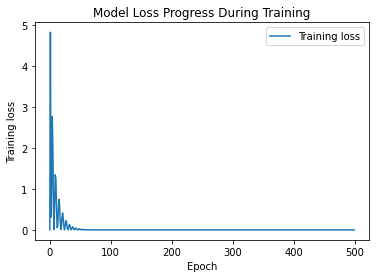

In [34]:
plt.plot(epochs_hist.history['loss']);
                                      # Por meio do gráfico abaixo, podemos observar que o erro estabiliza
                                      # em 0 após 100 épocas, o que nos dá a informação de quantas épocas
                                      # podemos utilizar em nossa rede.
plt.title('Model Loss Progress During Training');
plt.xlabel('Epoch');
plt.ylabel('Training loss');
plt.legend(['Training loss']);

In [36]:
model.get_weights()           # Mostra os pesos calculados do modelos
                              # Um dos parâmetros vale 1.8 e o outro 32.0

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]

In [40]:
#testar o modelo
temp_c = 10
temp_f = model.predict([temp_c])
temp_f

array([[50.]], dtype=float32)

In [41]:
temp_f1 = 9/5 * temp_c + 32.0
temp_f1

50.0